# `dragon_scales`

Start at the max pixel value in image and group the ungrouped pixels within input radius. Goto the next highest pixel value not already included in a group and repeat. The radius can be a fixed value used for all pixels or taken from input image.

In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Mon Jan 21 15:32:59 EST 2019


In [2]:
# Routine to display images using ds9 in notebook
display_map()
{
img=$1
map=$2
png=$3
reg=$4

if test x${reg} == x
then
  region=""
else
  region="-region $reg"
fi

ds9 -geom 1550x824 -scale asinh -scale limits 0 200 \
  -zoom 2 -cmap load sunset-in-atlantis.sao  \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  $img \
  -frame new -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
  $map -scale linear -scale mode minmax \
  $region -regions select all -regions color black -regions select none \
  -tile yes \
  -saveimage png $png -exit 

display < $png
}

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

## Example 1, fixed radius

Locate max pixel, draw a 10 pixel circle around it.  Goto the next max pixel, and draw a cirlce around it excluding any pixels already grouped.  Repeat.

In [4]:
dragon_scales smimg.fits psf=10 outfile=ds_10px.map \
  binimg=ds_10px.img shape=circle clobber=yes

In [5]:
map2reg ds_10px.map ds_10px.reg

map2reg
          infile = ds_10px.map
         outfile = ds_10px.reg
         verbose = 1
         clobber = no
            mode = ql

1
163
325
488
489
164
2
326
3
165
327
490
328
491
166
4
5
329
167
492
168
6
493
330
169
494
331
7
332
495
8
170
496
333
171
9
334
497
10
172
498
335
11
173
12
499
336
174
13
500
337
175
14
501
338
176
15
502
339
177
16
503
340
178
504
17
341
179
18
505
342
180
19
506
343
181
20
507
344
182
21
508
183
345
22
509
184
346
23
510
347
185
24
348
511
186
25
512
349
187
26
350
513
188
27
514
351
189
28
515
352
190
29
353
516
191
30
354
517
192
31
355
193
518
32
356
194
519
33
195
357
520
34
196
358
521
35
197
359
522
36
198
360
523
37
199
361
524
38
362
200
525
39
363
526
201
40
364
202
527
41
365
203
528
42
366
204
529
43
367
205
530
44
206
368
531
45
207
369
532
46
208
370
533
47
371
209
534
48
210
535
372
49
211
536
373
50
537
212
374
51
538
213
375
52
539
214
376
53
540
215
377
54
216
541
378
55
542
379
217
56
380
543
218
57
219
381
544
58
220
382
545
59


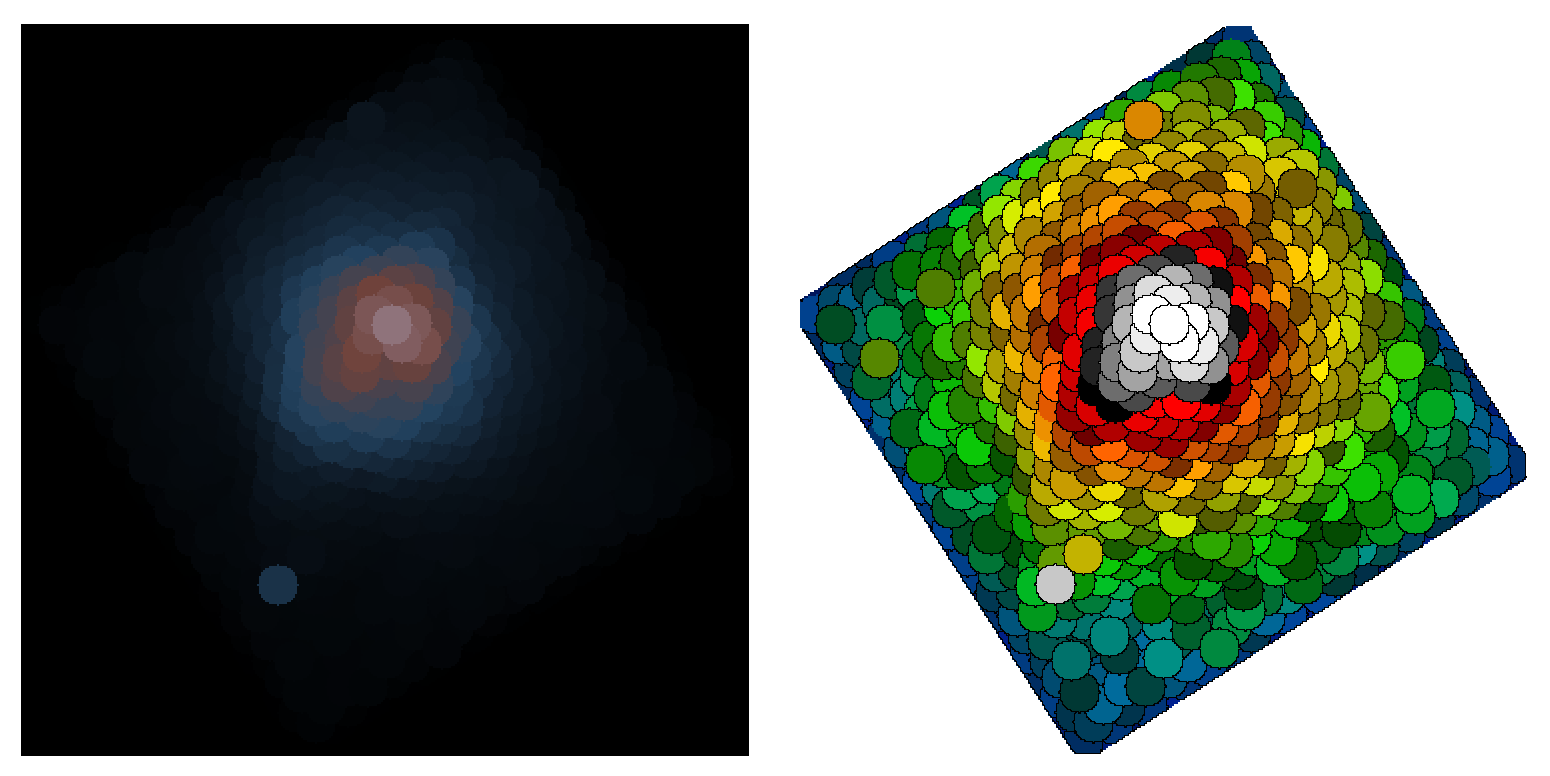

In [6]:
display_map ds_10px.img ds_10px.map ds_10px.png ds_10px.reg


Users will find many small groups filling in the gaps between larger ones.  This can be adjusted later
using the `merge_too_small` scripts (below)



## Example 2, variable radius

In this example we create an input radius map.  The radius map is create such that a circle at
each pixel with a radius equal to the pixel value will contain at least 500 counts, with a 
maximum radius of 100 pixels.

This radius map is then input to `dragon_scales`

In [7]:
dragon_scales smimg.fits min500.map out=ds_500cts.map  \
  binimg=ds_500cts.img clob+

In [8]:
map2reg ds_500cts.map ds_500cts.reg clob+

map2reg
          infile = ds_500cts.map
         outfile = ds_500cts.reg
         verbose = 1
         clobber = yes
            mode = ql

498
1
995
1492
499
1493
2
996
500
1494
3
997
501
1495
998
4
999
502
1496
5
1000
503
1497
6
1001
504
1498
7
1002
505
1499
8
1003
1500
506
9
1004
1501
507
10
1005
1502
508
11
1006
1503
509
12
1007
1504
13
510
1505
1008
14
511
1506
1009
15
512
1507
1010
16
513
1508
1011
17
514
1012
1509
18
515
1013
1510
19
516
1014
1511
20
517
1015
21
1512
518
1513
22
1016
519
1514
23
1017
520
1515
1018
521
24
1516
1019
522
25
1020
523
1517
26
1021
524
1518
27
525
1022
1519
28
1023
526
1520
29
1024
527
1521
30
528
1025
1522
31
1026
529
1523
32
530
1027
1524
33
531
1028
34
1525
532
1029
35
1526
533
1030
36
1527
534
1031
37
1528
535
1032
38
1529
1033
536
39
1530
1034
537
40
1531
1035
538
41
1532
539
1036
42
1533
540
1037
43
1534
541
1038
44
1535
542
1039
45
1536
543
1040
46
1537
544
1041
47
1538
545
1042
48
1539
546
1043
49
1540
547
1044
50
1541
548
1045
51
1542
549
10

952
1449
455
1945
953
1450
456
1946
954
1451
457
1947
955
1452
1948
458
956
1453
459
1949
957
1454
460
1950
958
1455
1951
461
959
1456
1952
462
960
1457
1953
463
961
1458
1954
464
962
1459
1955
465
963
1460
1956
466
964
1461
1957
467
965
1462
1958
468
966
1463
1959
469
967
1464
1960
470
968
1465
1961
471
969
1466
1962
472
970
1963
1467
473
971
1964
1468
474
972
1965
475
1469
973
1966
476
1470
974
1967
477
1471
975
1968
1472
478
976
1969
1473
479
977
1474
1970
480
1971
481
978
1475
1972
482
979
1476
1973
483
980
1477
1974
484
981
1478
485
1975
982
1479
486
1976
983
1480
487
1977
984
1481
488
1978
985
1482
489
1979
986
1483
490
1980
987
1484
491
1981
988
1485
492
1982
989
1486
493
1983
990
1487
494
1984
991
1488
495
1985
992
1489
496
1986
993
1490
497
1987
994
1491
1988


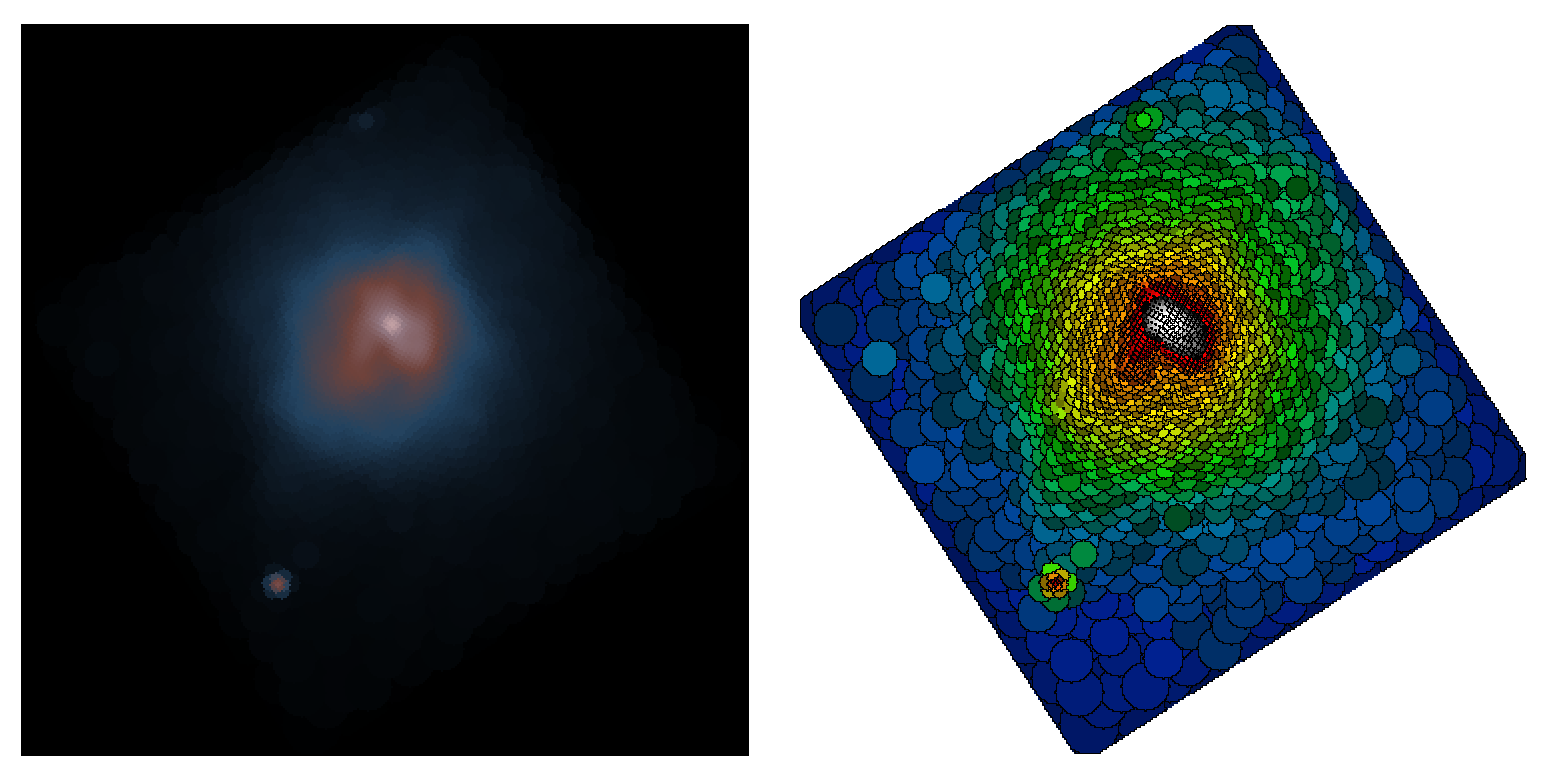

In [9]:
display_map ds_500cts.img ds_500cts.map ds_500cts.png ds_500cts.reg

The same effects are seen in the variable radius compared to the fixed radius input.

Note: in the case of the radius map input, the smoothing is not guaranteed to contain at least 500 counts when smoothing since the groups are not allowed to overlap.

This algorithm does not require that the input image be smoothed.


## Exampe 3 squares

In [10]:
dragon_scales smimg.fits psf=10 outfile=ds_10px_sqr.map \
  binimg=ds_10px_sqr.img shape=box clobber=yes
  

In [11]:
map2reg ds_10px_sqr.map ds_10px_sqr.reg

map2reg
          infile = ds_10px_sqr.map
         outfile = ds_10px_sqr.reg
         verbose = 1
         clobber = no
            mode = ql

1
249
125
374
250
126
375
2
251
376
3
127
252
377
4
128
378
129
5
253
6
379
254
130
7
131
255
380
8
132
256
381
9
257
133
382
10
258
134
383
135
259
11
384
136
260
12
385
261
137
13
386
138
262
14
387
263
139
15
388
264
140
16
389
265
17
141
390
266
18
142
391
19
143
267
392
20
144
268
393
145
21
394
269
146
22
395
270
147
23
271
396
148
24
272
397
149
25
273
398
150
26
274
399
151
27
275
400
152
28
276
401
153
29
277
402
154
30
278
403
155
31
279
404
156
32
280
405
157
33
281
406
158
34
282
407
159
35
283
408
160
36
284
409
161
37
285
410
162
38
286
411
163
39
287
412
164
40
288
413
165
41
289
414
166
42
290
415
167
43
291
416
168
44
292
417
169
45
293
418
170
46
294
419
171
295
47
420
172
296
48
421
173
297
49
422
174
298
50
423
175
299
51
424
176
300
52
425
177
301
53
426
178
302
54
427
179
303
55
428
180
304
56
429
181
305
57
430
182
306
58

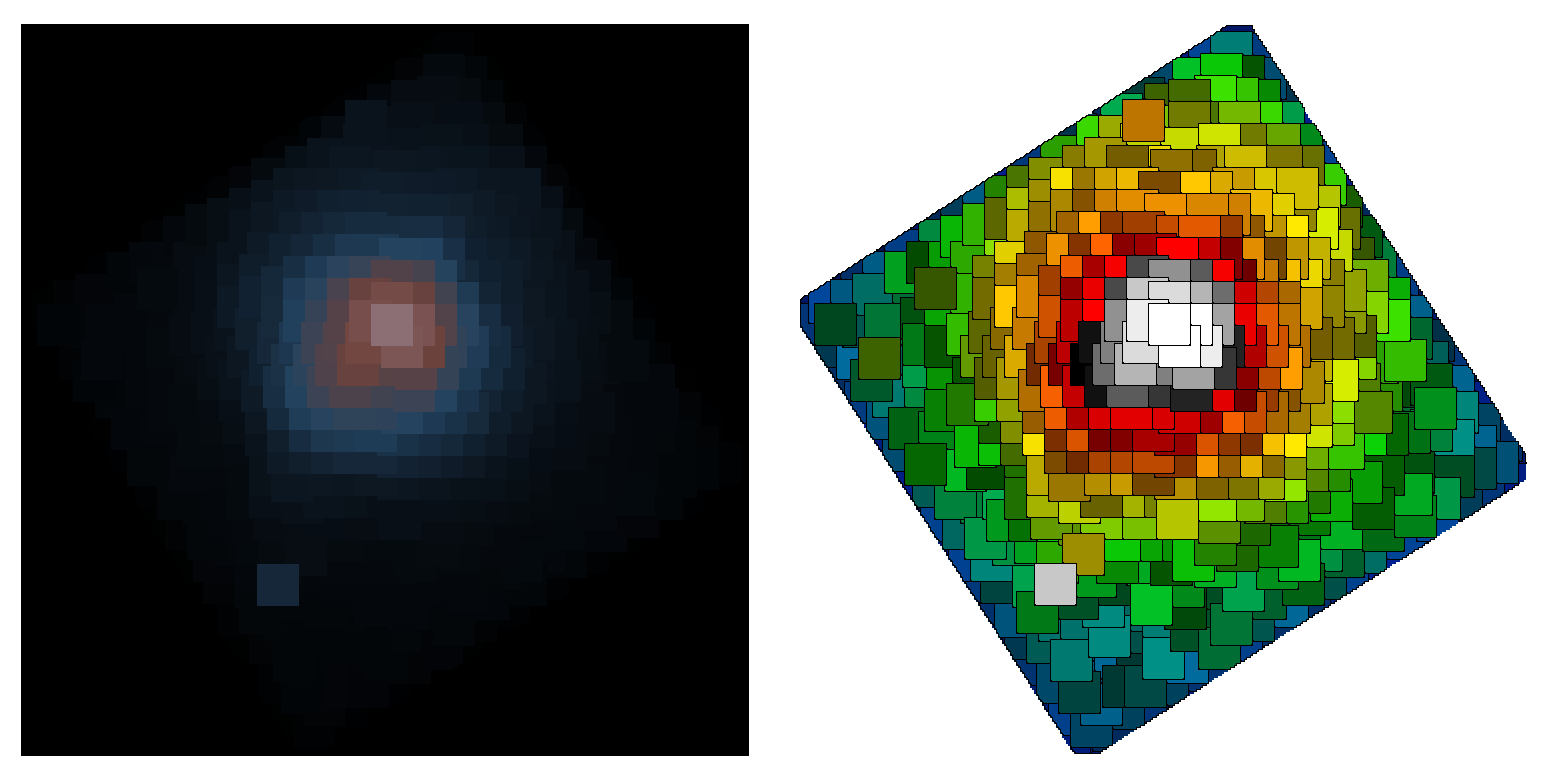

In [12]:
display_map ds_10px_sqr.img ds_10px_sqr.map ds_10px_sqr.png ds_10px_sqr.reg
